Analysis about the traffic accidents in the UK

###### Import relevant libraries

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # data visualization
import matplotlib  # data visualization

###### Read datasets

In [2]:
dataframe_05_07 = pd.read_csv("accidents_2005_to_2007.csv")
dataframe_09_11 = pd.read_csv("accidents_2009_to_2011.csv")
dataframe_12_14 = pd.read_csv("accidents_2012_to_2014.csv")

# Concatenate traffic datasets
df = pd.concat([dataframe_05_07, dataframe_09_11, dataframe_12_14], axis=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Check if the datasets have duplicates

In [3]:
print("Number of Duplicates: ",(df.duplicated().sum()))
df["Dup_Flag"] = df.duplicated()
df = df.loc[df["Dup_Flag"]==False]
df.drop(("Dup_Flag"), axis=1, inplace=True)

Number of Duplicates:  34155


In [4]:
df.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.469894e+06,1.469894e+06,1.469894e+06,1.469894e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,0.0,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06
mean,4.398972e+05,2.986746e+05,-1.432652e+00,5.257597e+01,3.078191e+01,2.838774e+00,1.831846e+00,1.350891e+00,4.118639e+00,3.535705e+02,4.089804e+00,1.008856e+03,3.907896e+01,NaN,2.663909e+00,3.800811e+02,1.356722e+00,2.009309e+03
std,9.553525e+04,1.612611e+05,1.404330e+00,1.452076e+00,2.551827e+01,4.014209e-01,7.152256e-01,8.257998e-01,1.924702e+00,2.592795e+02,1.429898e+00,1.821693e+03,1.417134e+01,NaN,3.207808e+00,1.300899e+03,4.792192e-01,3.021200e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.757500e+05,1.780082e+05,-2.363678e+00,5.148790e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.409300e+05,2.653400e+05,-1.391637e+00,5.227671e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,4.000000e+00,1.290000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.232900e+05,3.966000e+05,-2.184820e-01,5.346436e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.320000e+02,6.000000e+00,7.260000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469995 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1469995 non-null  object 
 1   Location_Easting_OSGR                        1469894 non-null  float64
 2   Location_Northing_OSGR                       1469894 non-null  float64
 3   Longitude                                    1469894 non-null  float64
 4   Latitude                                     1469894 non-null  float64
 5   Police_Force                                 1469995 non-null  int64  
 6   Accident_Severity                            1469995 non-null  int64  
 7   Number_of_Vehicles                           1469995 non-null  int64  
 8   Number_of_Casualties                         1469995 non-null  int64  
 9   Date                                         14

#### Check for missing values

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame(data=percent_missing.values, index=percent_missing.index)
missing_value_df.columns = ["Missing Value %"]

In [8]:
missing_value_df

,Missing Value %
Accident_Index,0.000000
Location_Easting_OSGR,0.006871
Location_Northing_OSGR,0.006871
Longitude,0.006871
Latitude,0.006871
Police_Force,0.000000
Accident_Severity,0.000000
Number_of_Vehicles,0.000000
Number_of_Casualties,0.000000
Date,0.000000


Correlation Matrix

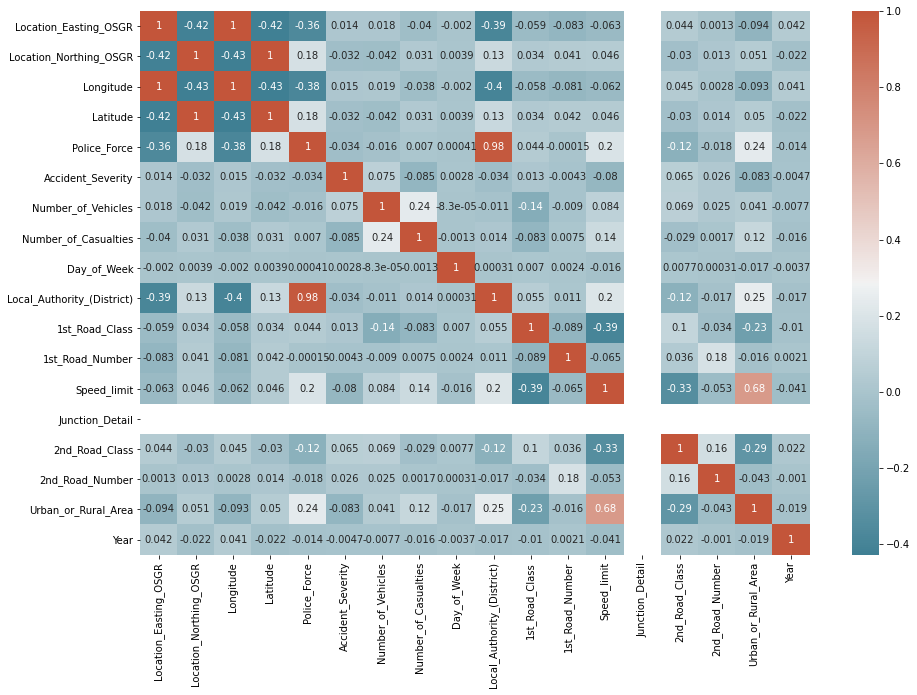

In [9]:
import matplotlib
import matplotlib.pyplot as plt
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Distribution of the target variable

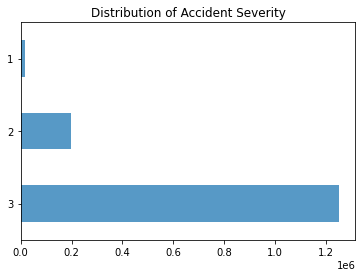

In [10]:
df["Accident_Severity"].value_counts().plot(kind="barh", alpha=0.75, figsize=(6,4), title="Distribution of Accident Severity")

#### Day of the week 

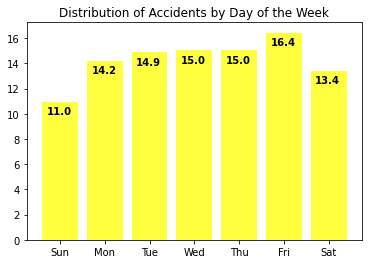

In [11]:
Day_of_Week_D = df["Day_of_Week"].value_counts().sort_index()/len(df)*100
Day_of_Week_D.index = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
plt.bar(Day_of_Week_D.index, Day_of_Week_D.values, alpha=0.75, color="yellow")
plt.title("Distribution of Accidents by Day of the Week")
for i, val in enumerate(Day_of_Week_D.values):
    plt.text(i-0.3, val-1,  str( "{:.{}f}".format( val, 1 )), color='black', fontweight='bold')

##### Accidents by Days

In [12]:
Acc_By_Date = pd.DataFrame()
Acc_By_Date["Accident_Severity"] = df["Accident_Severity"]
Acc_By_Date["Date"] = pd.to_datetime(df["Date"])
Acc_By_Date["Hour"] = df.Time.str.slice(0,2)
Acc_By_Date["Year"] = df["Year"]
Acc_By_Date["Day_of_Week"] = df["Day_of_Week"]

#### Accidents by Hours

Text(0.5, 0, 'Hour of the Day (24hr)')

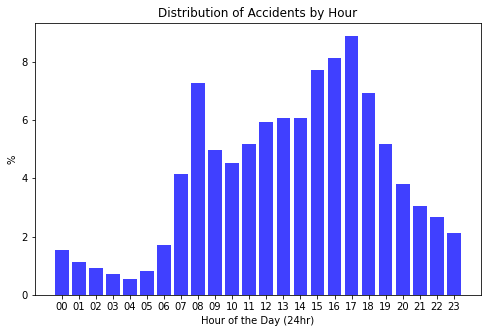

In [13]:
Acc_By_Hour = Acc_By_Date["Hour"].value_counts().sort_index()

Acc_By_Hour = (Acc_By_Hour/Acc_By_Hour.sum())*100

plt.figure(1, figsize=(8,5))
plt.bar(Acc_By_Hour.index, Acc_By_Hour.values, alpha=0.75, color="blue")
plt.title("Distribution of Accidents by Hour")
plt.ylabel("%")
plt.xlabel("Hour of the Day (24hr)")

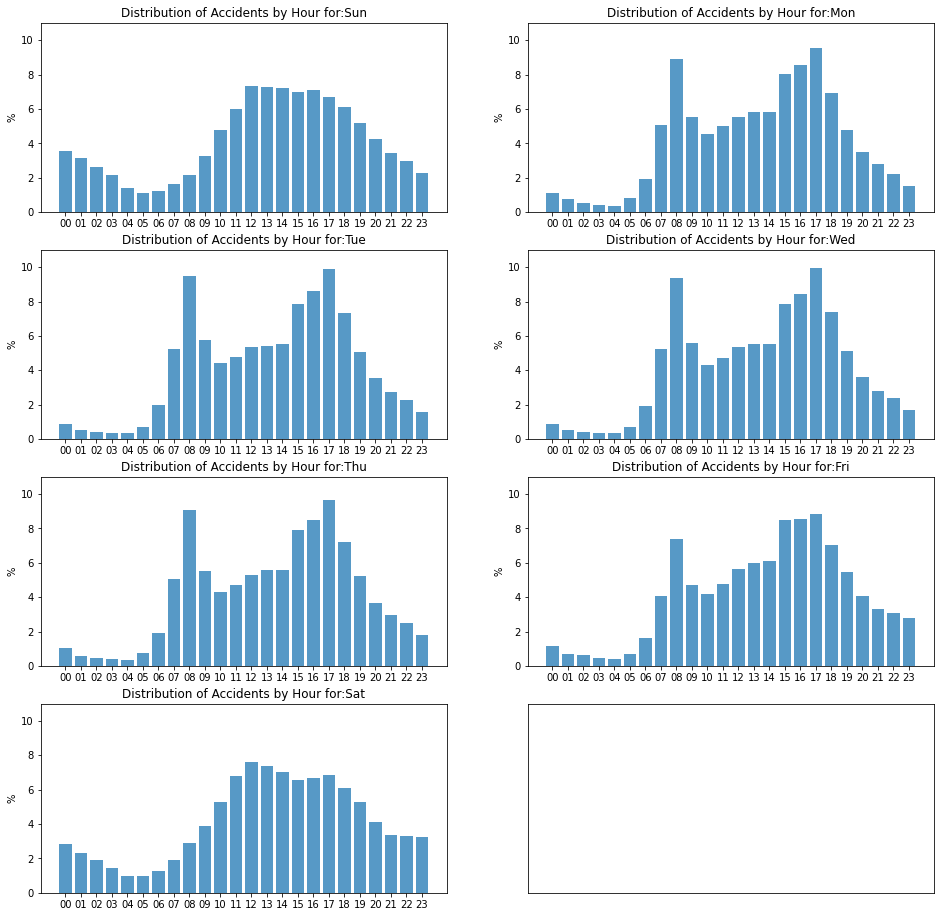

In [14]:
Day_Of_Week_Dict = {1:"Sun", 2:"Mon", 3:"Tue", 4:"Wed", 5:"Thu", 6:"Fri", 7:"Sat"}

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,16))
count = 0

for i, col in enumerate(Acc_By_Date["Day_of_Week"].sort_values().unique()):
    Acc_By_Hour_By_Day = Acc_By_Date["Hour"].loc[Acc_By_Date["Day_of_Week"]==col].value_counts().sort_index()
    Acc_By_Hour_By_Day = (Acc_By_Hour_By_Day/Acc_By_Hour_By_Day.sum())*100
    
    ax[i//2, count].bar(Acc_By_Hour_By_Day.index, Acc_By_Hour_By_Day.values, alpha=0.75)
    ax[i//2, count].title.set_text("Distribution of Accidents by Hour for:" + str(Day_Of_Week_Dict.get(col)))
    ax[i//2, count].set_ylim([0,11])
    ax[i//2, count].set_ylabel("%")

    count = count + 1
    if count == 2: count = 0
        
ax[3,1].set_yticks([])
ax[3,1].set_xticks([])
plt.show()

#### Categorical Data Bar plots for fields with data type object and fields who datatype is interger but still categorical data:

In [15]:
Object_Col = df.drop(["Accident_Index", "Date", "Time"], axis=1).select_dtypes("object").columns

Object_Col = list(Object_Col)

Object_Col.append("Speed_limit")
Object_Col.append("Local_Authority_(District)")
Object_Col.append("1st_Road_Class")
Object_Col.append("2nd_Road_Class")
Object_Col.append("Police_Force")
Object_Col.append("Urban_or_Rural_Area")

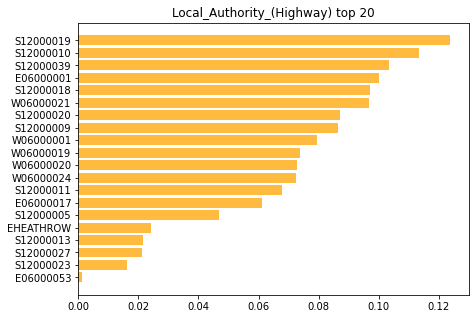

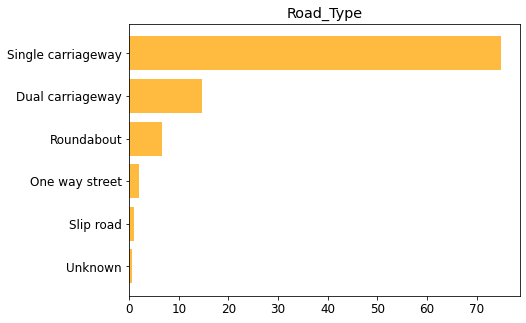

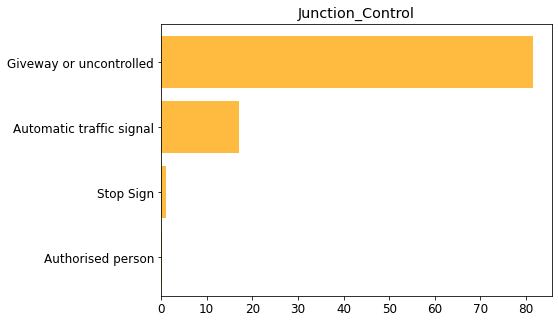

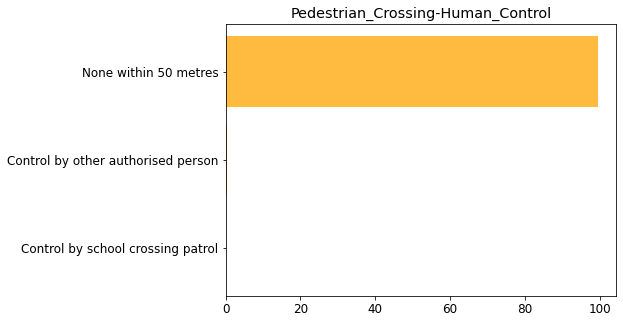

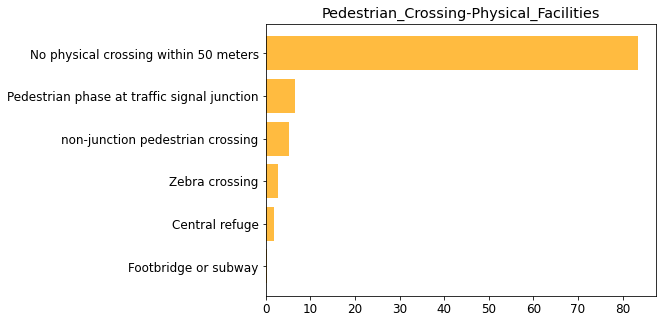

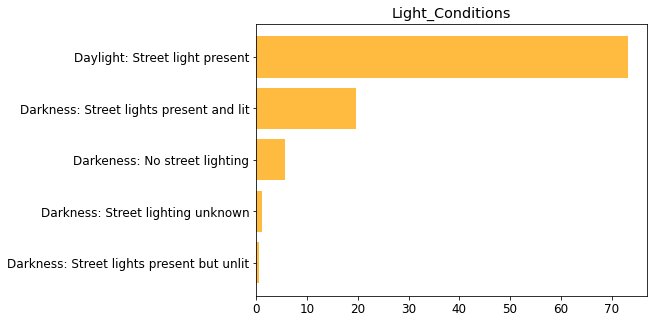

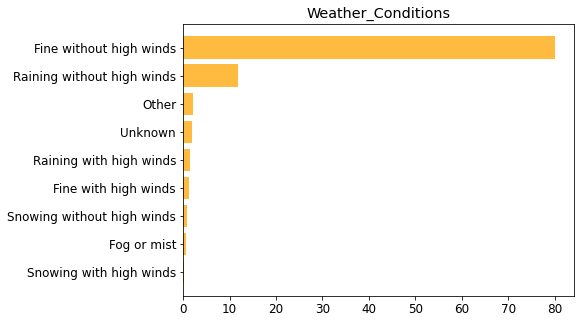

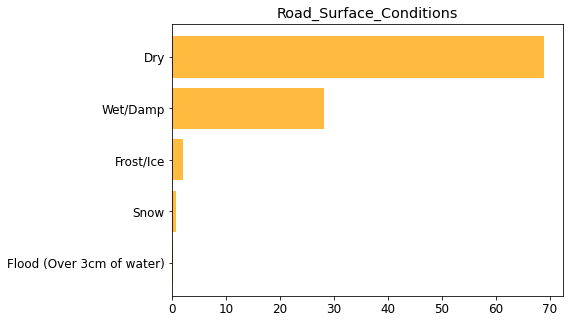

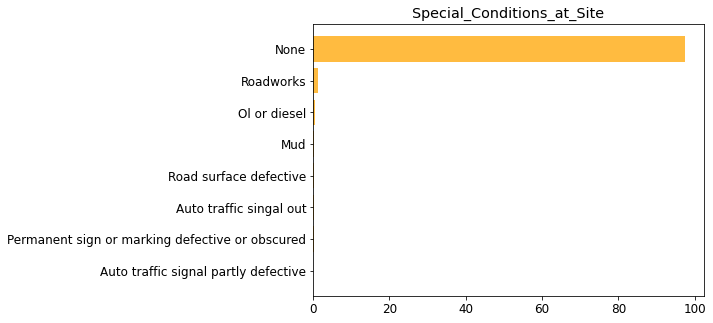

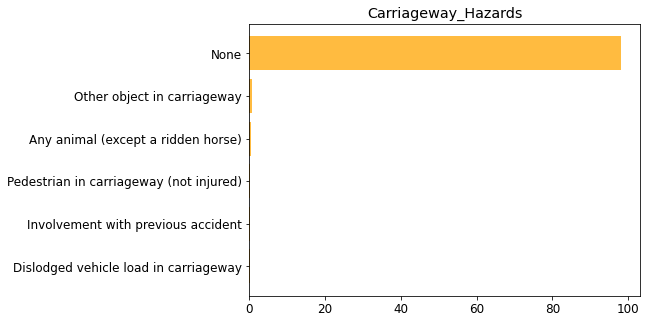

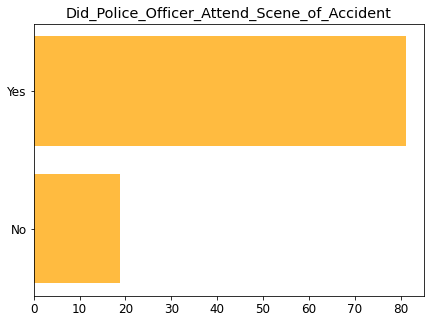

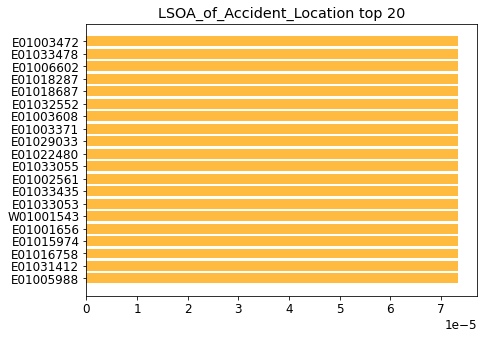

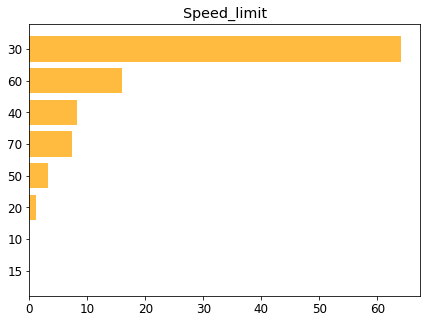

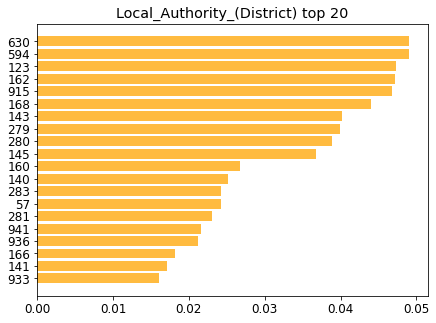

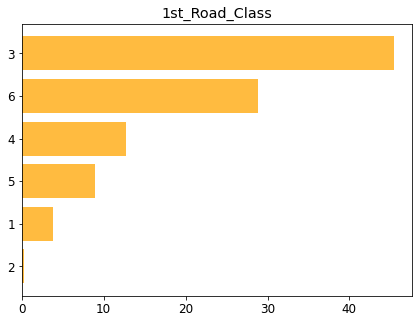

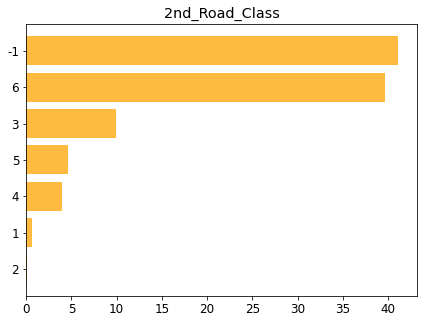

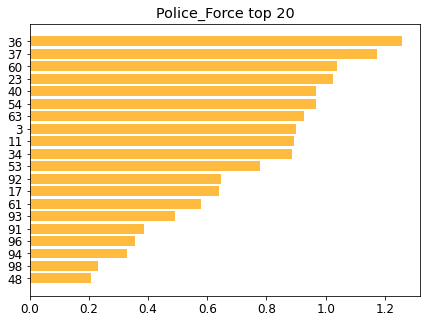

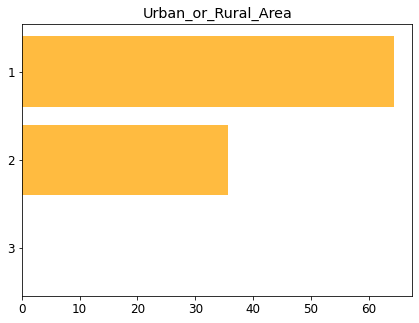

In [16]:
for i, col in enumerate(Object_Col):

    Agg = df[col].value_counts().sort_values()
    
    Agg = (Agg/Agg.sum())*100
    
    if len(Agg) < 20:
    
        plt.figure(i, figsize=(7,5))
        plt.barh(Agg.index.astype(str), Agg.values, alpha=0.75,  color="orange")
        plt.title(str(col))
        plt.rc('font', size=12)    
        plt.show()
        
    else:
        
        Agg = Agg.head(20)
        plt.figure(i, figsize=(7,5))
        plt.barh(Agg.index.astype(str), Agg.values, alpha=0.75, color="orange")
        plt.title(str(col) + " top 20")
        plt.rc('font', size=12)    
        plt.show()

##### Accident_Severity onto these features:

<Figure size 504x360 with 0 Axes>

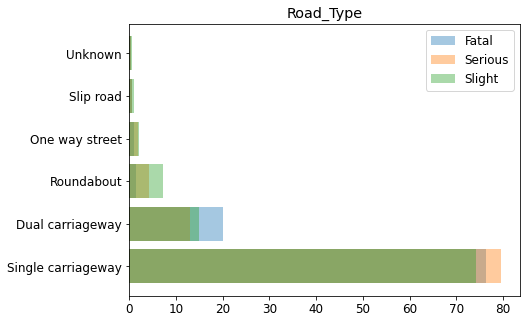

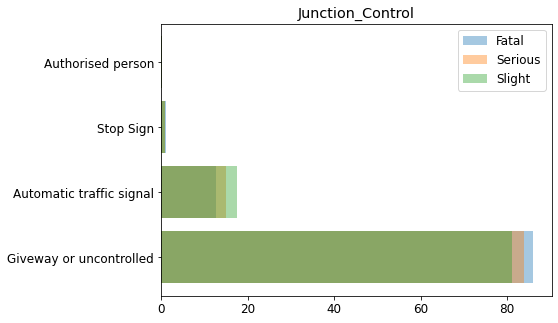

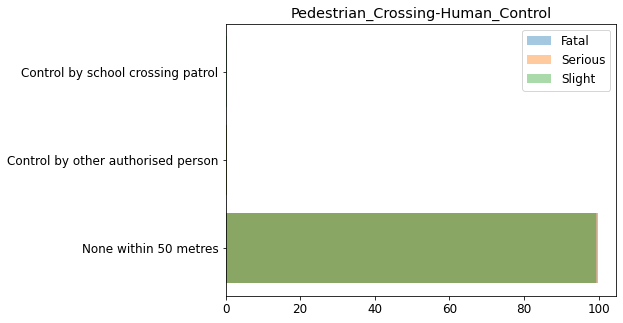

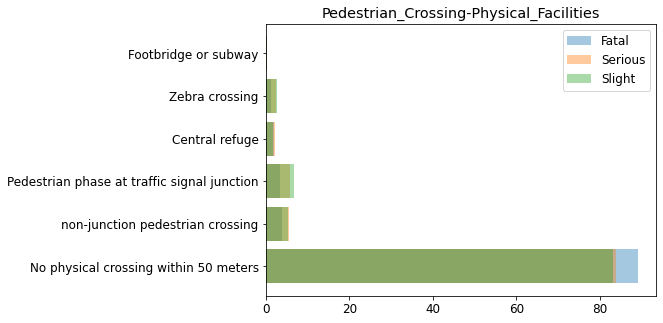

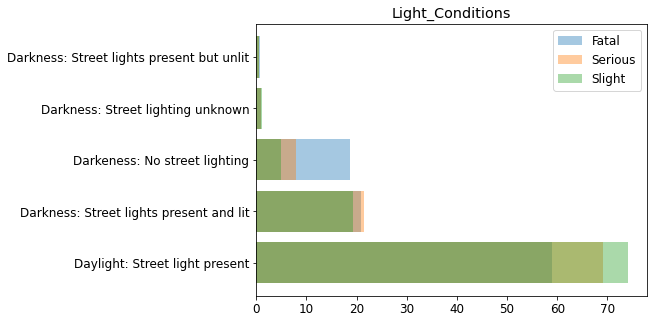

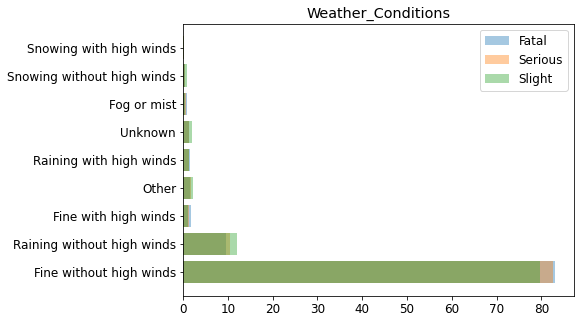

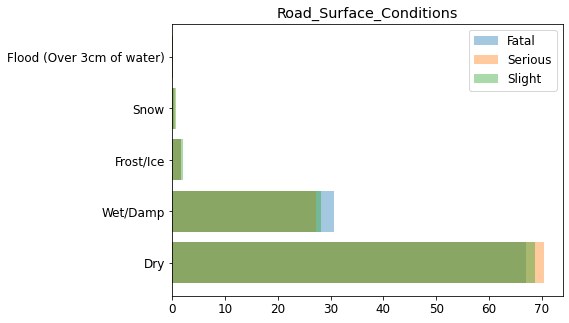

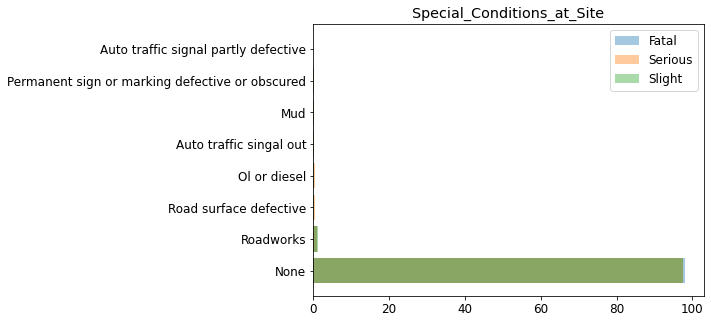

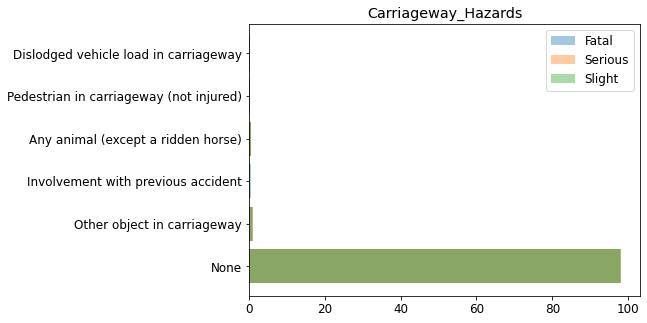

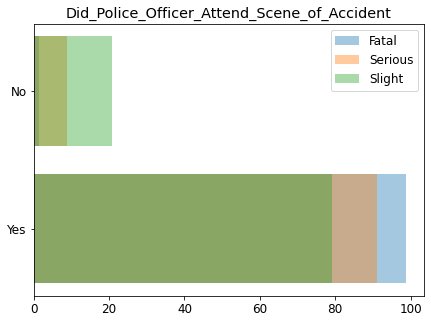

<Figure size 504x360 with 0 Axes>

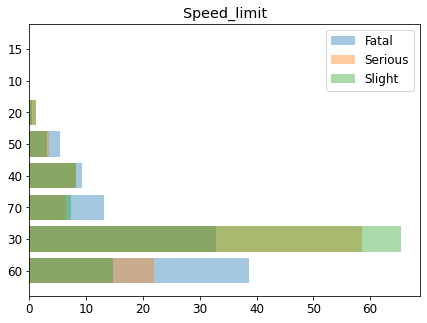

<Figure size 504x360 with 0 Axes>

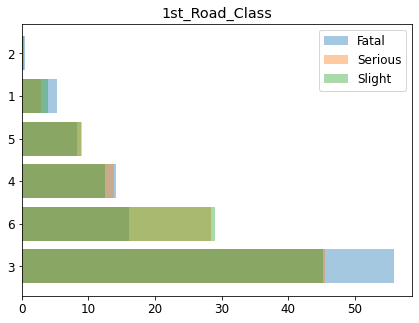

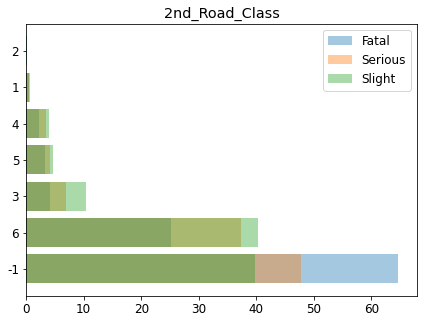

<Figure size 504x360 with 0 Axes>

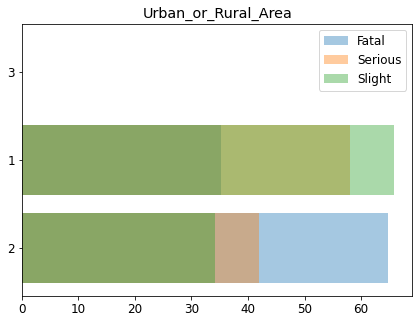

In [17]:
Acc_Sev_Dict = {1:"Fatal",
                2:"Serious",
                3:"Slight"}

for j, col in enumerate(Object_Col):
    
    plt.figure(j, figsize=(7,5))
    
    if len(df[col].unique()) >20:
        pass
    
    else:
        
        for i in range(1,4):
            DV = df[col].loc[df["Accident_Severity"]==i].value_counts()
            DV = (DV/DV.sum())*100
            plt.barh(DV.index.astype(str), DV.values, alpha=0.40, label=Acc_Sev_Dict[i])
    
        plt.legend()
        plt.title(col)
        plt.show()